# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Based on the provided dataset that contains information on 426K cars, we will build a linear regression model to help the client, a used car dealership a used car dealership, to predict the price of a used car. 

This model will also help to identify the key drivers for used car prices and understand how they contribute to the car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

We want to understand whether particular columns have tons fo missing values. If that is the case, those columns should be eliminated from the model. 

For the columns, 'price' will be the target column to predict.

Some columns (e.g. 'year', 'odometer') contains numerical values. The column 'cylinders' can be easily converted to numerical values. Some columns contains categorical features, including 'manufacturer', 'model', 'fuel', 'title_status','transmission','drive','type','paint_color','state'. We can use  one hot encoding to covert them into numerical values. Some columns contains ordinal featue, including 'conditions' and 'size', we can use ordinal encoder to tranform them into numerical features.

Column 'VIN' should be irrelevant for the prediction and should be eliminated from the dataframe.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np

In [15]:
#Load the data
df=pd.read_csv("C:\\Users\\zhk11\\Desktop\\practice11\\data\\vehicles.csv")

In [16]:
# check the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [17]:
# check number of unique values for each column
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118242
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [18]:
# drop column size because lots of values are missing in this column; drop column VIN and id because they are not relevant to car price
df=df.drop(columns=['size','VIN','id'],axis=1)
# drop column region and model, because as categorical columns, they have too many unique input values.
df=df.drop(columns=['region','model'],axis=1)

In [19]:
# drop the rows with missing values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117169 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         117169 non-null  int64  
 1   year          117169 non-null  float64
 2   manufacturer  117169 non-null  object 
 3   condition     117169 non-null  object 
 4   cylinders     117169 non-null  object 
 5   fuel          117169 non-null  object 
 6   odometer      117169 non-null  float64
 7   title_status  117169 non-null  object 
 8   transmission  117169 non-null  object 
 9   drive         117169 non-null  object 
 10  type          117169 non-null  object 
 11  paint_color   117169 non-null  object 
 12  state         117169 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 12.5+ MB


In [20]:
# print out the unique values for each ordinal feature
print(df.condition.unique())
print(df.cylinders.unique())

['excellent' 'good' 'like new' 'new' 'fair' 'salvage']
['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']


In [21]:
# check current dataframe and make sure it s consistent with expectation
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2020.0,cadillac,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,wy
426860,39990,2017.0,infiniti,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,32990,2016.0,infiniti,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,33590,2018.0,lexus,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy


In [22]:
# For numerical columns, remove outliners by defining the range
# Name the new dataframe as df1
df1=df[(df['price'] <200000) & (df['price']>400)& (df['odometer'] <250000)];

In [23]:
# set X, y for fit
y=df1['price'].astype(float);
X=df1.drop(columns='price', axis=1)

In [24]:
# covert the norminal features to numerical features using function get_dummies
norminal_column=['manufacturer','fuel', 'title_status','transmission','drive','type','paint_color','state'];
new_X =  pd.get_dummies(X, columns=norminal_column)
print(new_X)

          year  condition    cylinders  odometer  manufacturer_acura  \
31      2013.0  excellent  6 cylinders  128000.0                   0   
32      2012.0       good  8 cylinders   68696.0                   0   
33      2016.0       good  6 cylinders   29499.0                   0   
34      2019.0  excellent  6 cylinders   43000.0                   0   
35      2016.0       good  6 cylinders   17302.0                   0   
...        ...        ...          ...       ...                 ...   
426859  2020.0       good  6 cylinders    7701.0                   0   
426860  2017.0       good  8 cylinders   41664.0                   0   
426866  2016.0       good  8 cylinders   55612.0                   0   
426874  2018.0       good  6 cylinders   30814.0                   0   
426878  2018.0       good  6 cylinders   30112.0                   0   

        manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
31                            0                       

In [25]:
# conver the ordinal features to numerical featurs using map function

new_X['condition'] =  new_X['condition'] .map({'new':5, 'like new':4,'excellent':3, 'good':2,'fair':1, 'salvage':0})
new_X['cylinders'] =  new_X['cylinders'] .map({'6 cylinders':6, '8 cylinders':8,'4 cylinders':4, '5 cylinders':5,'10 cylinders':10, '3 cylinders':3,'12 cylinders':12, 'other':8})


In [26]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108656 entries, 31 to 426878
Columns: 139 entries, year to state_wy
dtypes: float64(2), int64(2), uint8(135)
memory usage: 18.1 MB


Log transformation is a common technique used to reduce skewness in a distribution and make it more symmetric and easier to analyze. Take logarithmic transformation of target column (used car price) to reduce its skewness.

Text(0, 0.5, 'counts')

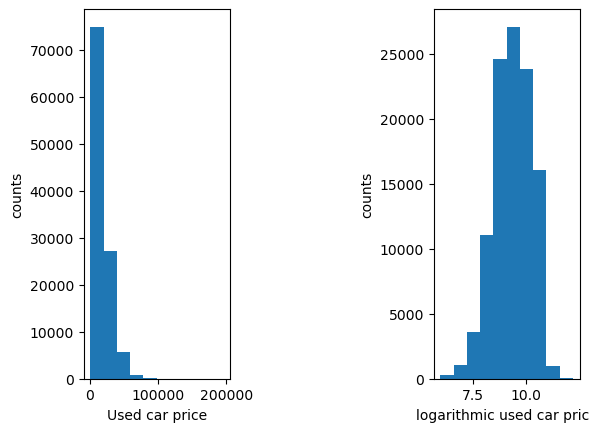

In [27]:
# plot histogram of the target column using linear scale or logarithmic scale
plt.subplot(1,3,1)
plt.hist(y)
plt.xlabel('Used car price')
plt.ylabel('counts')
plt.subplot(1,3,3)
plt.hist(np.log(y))
plt.xlabel('logarithmic used car price')
plt.ylabel('counts')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [30]:
#split the dataset into training set and test set; price column needs logarithmic transformation
X_train, X_test, y_train, y_test = train_test_split(new_X, np.log(y), random_state = 42);

In [31]:
# Using GridSearchCV to find the optimal value for the superparameter alpha in the Ridge regression model
ridge_param_dict = {'ridge__alpha': np.logspace(0, 3, 50)}
# build a pipeline and standardize the values first
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 0.24703747505058374
Test MSE: 0.2484106347830706


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

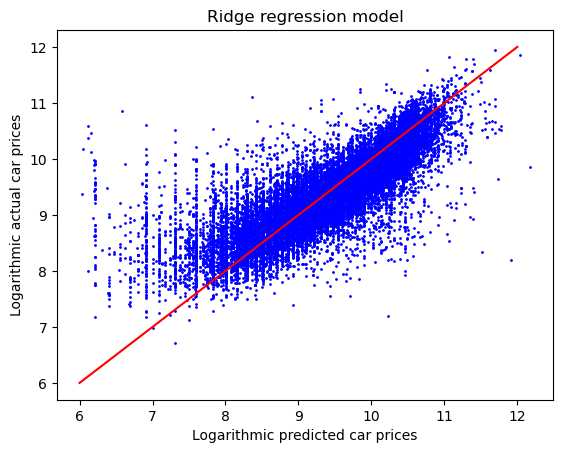

In [57]:
# plot the actual car prices agaisnt the predicted car price in test set
plt.plot(y_test,ridge_test_preds,'bo', markersize=1)
plt.xlabel('Logarithmic predicted car prices')
plt.ylabel('Logarithmic actual car prices')
plt.title('Ridge regression model')
# plot the diagonal line
plt.plot([6 ,12],[6,12], 'r-')

In [33]:
best_estimator = ridge_grid.best_estimator_
best_model = ridge_grid.best_estimator_.named_steps['ridge']
feature_names = X_train.columns
coefs_ridge = best_model.coef_

In [35]:
# extract the value for the superparameter alpha
best_model

Ridge(alpha=138.94954943731375)

In [42]:
pd1=pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_ridge})
pd1['abs_coef']=abs(pd1.coef)

In [43]:
# sort the coefficient based on their absolute values, from largest to smallest
pd1=pd1.sort_values(by='abs_coef', ascending=False)
pd1.head(25)

,feature_names,coef,abs_coef
3,odometer,-0.409705,0.409705
0,year,0.210006,0.210006
2,cylinders,0.145296,0.145296
1,condition,0.129423,0.129423
61,drive_fwd,-0.082113,0.082113
46,fuel_diesel,0.080682,0.080682
72,type_sedan,-0.078240,0.078240
73,type_truck,0.074226,0.074226
59,transmission_other,0.064628,0.064628
60,drive_4wd,0.061451,0.061451


In [38]:
# Using GridSearchCV to find the optimal value for the superparameter alpha in the Lasso regression model
lasso_param_dict = {'lasso__alpha': np.logspace(-1.5, 2, 50)}
# build a pipeline and standardize the values first
lasso_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('lasso', Lasso())])
lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_param_dict)
lasso_grid.fit(X_train, y_train)
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

# ANSWER CHECK
print(f'Train MSE: {lasso_train_mse}')
print(f'Test MSE: {lasso_test_mse}')
lasso_pipe

Train MSE: 0.27448017530158586
Test MSE: 0.27629031620549926


Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso())])

In [39]:
best_estimator1 = lasso_grid.best_estimator_
best_model1 = lasso_grid.best_estimator_.named_steps['lasso']
feature_names = X_train.columns
coefs_lasso = best_model1.coef_

In [28]:
# extract the value for the superparameter alpha
best_model1

Lasso(alpha=0.03162277660168379)

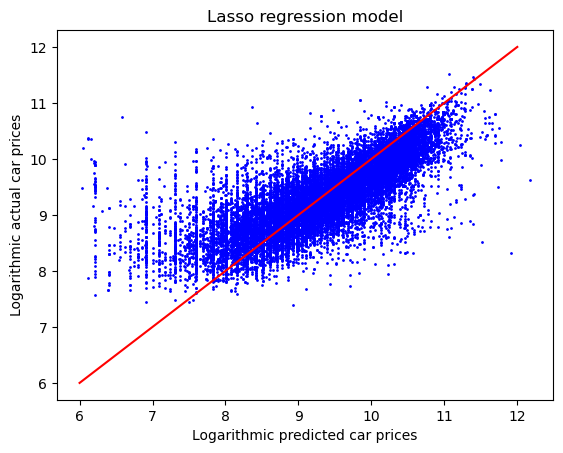

In [59]:
# plot the actual car prices agaisnt the predicted car price in test set
plt.plot(y_test,lasso_test_preds,'bo',markersize=1)
plt.xlabel('Logarithmic predicted car prices')
plt.ylabel('Logarithmic actual car prices')
plt.title('Lasso regression model')
# plot the diagonal line
plt.plot([6 ,12],[6,12], 'r-')

In [45]:
pd2=pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_lasso})
pd2['abs_coef']=abs(pd2.coef)

In [46]:
# sort the coefficient based on their absolute values, from largest to smallest
pd2=pd2.sort_values(by='abs_coef', ascending=False)
pd2.head(25)

,feature_names,coef,abs_coef
3,odometer,-0.398770,0.398770
0,year,0.193426,0.193426
2,cylinders,0.143772,0.143772
61,drive_fwd,-0.130800,0.130800
1,condition,0.095732,0.095732
46,fuel_diesel,0.085774,0.085774
59,transmission_other,0.083539,0.083539
72,type_sedan,-0.063103,0.063103
73,type_truck,0.049357,0.049357
48,fuel_gas,-0.027798,0.027798


### Evaluation

In this pratice, we built two linear regression models based on Ridge and Lasso approach to predict the price of a used car. We also determined the key factors that impact the price of a used car. Both models give rise to very similar results. They identify odometer, year, cylinders, drive, condition, type, fuel as the important factors. The signs of the coefficient of these factors indicate either they have positive or negative impact to the price for a used car.

Ridge regression model is a more complext model which contains more features but it also has smaller MSE (0.25). Lasso regression model can automatically choose features and it is a simpler model with less features, but its MSE is slightly bigger (0.28).

To evaluate both models, I plotted the predicted prices against acutal prices for the test set. The correlation between them are reasonably well for both models.

I conclude that I have information of value to bring back to my client.

### Deployment

Based on the dataset from 250K used cars, both Ridge and Lasso regression models are well performed and they can be deployed to predict the price of a used car.  Odometer, year, cylinders, drive, condition, type, fuel are important factors that determine the price of a used car. The primary findings are listed below.

Odometer: high mileage will reduce the car price

year: older age of a car will reduce its price

cylinders: cars with more cylinders are more expensive

drive: 4wd can increase the price; fwd can decrease the price

condition: better condition will increase the price

type: Truck will increase the price; sedan will decrease the price


fuel: diesel will increase the price; gas will decrease the price